# Spam Detection in Emails

This project aims to build a spam detection system using a logistic regression model on a dataset of emails.and evaluate the model's performance.

## Libraries Used

We will be using the following libraries:
- `numpy` for numerical operations
- `pandas` for data manipulation
- `matplotlib` for data visualization
- `sklearn` for machine learning and evaluation metrics


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Set up the matplotlib inline for Jupyter Notebooks
%matplotlib inline


In [2]:
# Load the dataset
df = pd.read_csv('emails.csv')

# Display the first few rows
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
# Check for missing values and duplicates
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:\n", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

Missing values:
 text    0
spam    0
dtype: int64
Duplicate rows:
 33


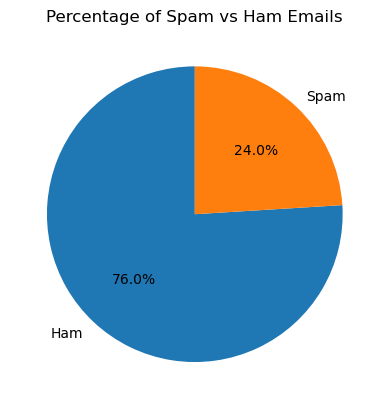

In [5]:
# Visualize the distribution of spam and ham emails
spam_count = df['spam'].value_counts()
spam_percentage = (spam_count / len(df)) * 100
plt.pie(spam_percentage, labels=['Ham', 'Spam'], autopct='%1.1f%%',startangle=90)
plt.title("Percentage of Spam vs Ham Emails")
plt.show()

## Data Preprocessing

We will clean the email text by removing the 'Subject:' prefix and undersample the ham emails to match the number of spam emails for a balanced dataset.


In [6]:
# Function to remove 'Subject:' from the email text
def remover(x):
    return x.replace('Subject:', "")

# Apply the remover function to the 'text' column
df['text'] = df['text'].apply(remover)

In [7]:
# Create subsets of ham and spam emails
ham_rows = df[df['spam'] == 0]
spam_rows = df[df['spam'] == 1]

# Undersample ham emails to match the number of spam emails
ham_rows = ham_rows.sample(n=len(spam_rows), random_state=42)
undersampled_data = pd.concat([ham_rows, spam_rows])

# Shuffle the undersampled dataset
undersampled_data = undersampled_data.sample(frac=1, random_state=12).reset_index(drop=True)

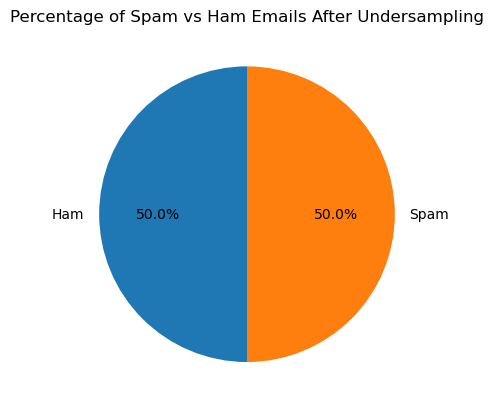

In [8]:
# Visualize the distribution after undersampling
plt.pie(undersampled_data['spam'].value_counts() / len(undersampled_data) * 100, labels=['Ham', 'Spam'],
        autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Spam vs Ham Emails After Undersampling")
plt.show()

## Feature Extraction

We will transform the text data into numerical format using TF-IDF vectorization.


In [9]:
# Prepare the features and target variable
X = undersampled_data['text']
y = undersampled_data['spam']

# Transform the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X_tfidf_matrix = vectorizer.fit_transform(X)


## Model Training and Evaluation

We will split the data into training and test sets, train a logistic regression model, and evaluate its performance using a confusion matrix and classification report.


In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_matrix, y, test_size=0.3, random_state=42)

# Train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_prediction = lr_model.predict(X_test)

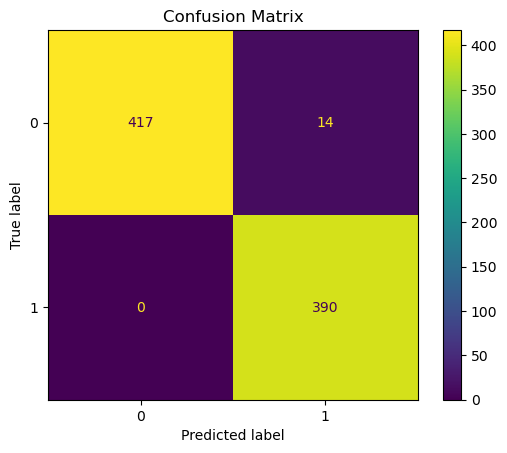

In [11]:
# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, lr_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Print the classification report
print(classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       431
           1       0.97      1.00      0.98       390

    accuracy                           0.98       821
   macro avg       0.98      0.98      0.98       821
weighted avg       0.98      0.98      0.98       821



## Conclusion

In this project, we successfully developed a spam detection model using logistic regression. The model demonstrated excellent performance, as evidenced by the following metrics:

    Precision: The model achieved a precision of 1.00 for ham emails (class 0) and 0.97 for spam emails (class 1), indicating high accuracy in its positive predictions.
    Recall: The recall was 0.97 for ham emails, showing that 97% of actual ham emails were correctly identified. For spam emails, the recall reached 1.00, successfully capturing all actual spam cases.
    F1-Score: The F1-score for both classes was approximately 0.98, reflecting a balanced performance between precision and recall.
    Overall Accuracy: The model achieved an impressive overall accuracy of 0.98, correctly classifying 98% of the email data.